In [55]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [56]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [57]:
# DJE = pd.read_csv('./magazine/final/DJE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [58]:
# DJE['ADFN_2'] = DJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [59]:
# DJE['ADFN_2']

### 5

In [60]:
# D5JE = pd.read_csv('./magazine/final/D5JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [61]:
# D5JE['ADFN_2'] = D5JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [62]:
# D5JE['ADFN_2']

In [63]:
D9JI = pd.read_csv('./magazine/final/D9JI_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [64]:
D9JI['ADFN_2'] = D9JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [65]:
D9JI['ADFN_2']

0      [ÎπàÌã∞ÏßÄ, Ìå®ÏÖò, Ï¢ã, Îäê, Ï¢ã, ÎãπÏãú, ÏÇ¨Îûë, ÏÇ¨Îûë, ÎÇòÏùò, Î¨ºÍ±¥, ÏÉàÎ°≠, ÏÇ¨Îûë,...
1      [Í∏çÏ†ï, Í∏∞Ïö¥, Î∑∞Ìã∞, ÎùºÏù¥ÌîÑ, Ï≤†Ìïô, Í∞ÄÏßÄ, Î∞∞Ïö∞, ÌïòÎä¨, DIOR, Î∑∞Ìã∞, Í∏ÄÎ°ú...
2      [ÌôîÎ†§, Ìå®ÌÑ¥, SIGNATURE, Î¶¨Ï≤òÎìú, ÌÄ∏, Îã§ÌÅ¨, Ìã∞, Ï¶ò, Ìûò, Î≥¥ÌÉú, Îç∞...
3      [Î¨º, Î∞©Ïö∏, Î¨¥Îä¨, ÏàòÏòÅÎ≥µ, Ïù¥Ï¶à, Îç∞, Ïù¥Ï¶à, DAZE, DAYZ, Ïã¨Ìîå, Î©îÌÉà...
4      [Î∞òÎ©¥, HEDI, SLIMANE, CELINE, ÌîºÎπÑ, ÌååÏùº, ÎÖï, CELINE,...
                             ...                        
349    [ÏßÄÏàò, Î≥ºÏàòÎ°ù, Ï¢ãÏïÑÏßê, ÏÑ±Í≤©, ÏòàÏÅòÎã§, ÎÖ∏Îûò, ÎÖ∏Î†•, Ïã§Î†•, ÏãúÌÇ¥, Í∏∞ÌöçÏÇ¨, Îßà...
350    [ÏßÄÏàò, ÏõÉÍ∏¥, Ï∫êÎ¶≠ÌÑ∞, Ïù¥ÏÉÅÌïú, Ï∫êÎ¶≠ÌÑ∞, ÎùºÏÑú, ÏõÉÍπÄ, BLACKPINK, ÌïòÎì†,...
351    [ÏßÄÏàò, Î©òÌä∏, Ïû¨Î∞åÏñ¥ÏÑú, Î≥¥Í≥†ÏûàÎäî, ÌñâÎ≥µÌï®, ÏßÄÏàò, Ìè≠Î∞ú, ‚òÜ, ÎÇòÏôÄ, Ï§¨ÏúºÎ©¥, ...
352    [Ï†ÄÎÖÅ, ÎèÑÎ†àÎØ∏, ÎßàÏºì, ÏßÄÏàò, BLACKPINK, ÏòàÏ†Ñ, ÏÜåÌÜµ, ÌïòÎ†§Íµ¨, v, Ïï±...
353    [Í∞êÎèÑ, Ï©å, BLACKPINK, Ï∞∏ÎèÑ, Í∏ÄÏΩî, ÎìúÎùºÎßà, Ï£ºÏù∏Í≥µ, ÏßÄÏàò, Ìå®ÎÑê, ÏßÄ...

### top50 Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±

In [66]:
top500 = pd.read_csv('./D9JI_top500.csv', sep='|', encoding = 'utf-8')

In [67]:
top500

word  count
0      ÏßÄÏàò   4231
1     ÏòàÏÅòÎã§   1889
2    DIOR    776
3     Í∑ÄÏóΩÎã§    740
4      ÏñºÍµ¥    524
..    ...    ...
495     Ìôî     20
496    ÏÉÅÏÉÅ     20
497    Ïû•ÎØ∏     20
498    ÏûëÏùÄ     20
499   ÏûàÎÇòÏöî     20

[500 rows x 2 columns]

In [68]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['ÏßÄÏàò', 'ÏòàÏÅòÎã§', 'DIOR', 'Í∑ÄÏóΩÎã§', 'ÏñºÍµ¥', 'ÏÇ¨Îûë', 'ÎÖ∏Îûò', 'Îß§Î†•', 'ÏùåÏïÖ', 'Ìå®ÏÖò', 'Î™©ÏÜåÎ¶¨', 'Ïä§ÌÉÄÏùº', 'Ï∂§', 'Î∞∞Ïö∞', 'ÏïÑÏù¥Îèå', 'Ïã§Î†•', 'Ïª¨Î†âÏÖò', 'ÎìúÎ†àÏä§', 'ÎùºÏù¥Î∏å', 'ÏÑ±Í≤©', 'Ïáº', 'Î∏åÎûúÎìú', 'ÏùåÏÉâ', 'ÏµúÍ≥†', 'Ïó¨ÏÑ±', 'ÎàÑÎÇò', 'ÏòÅÌôî', 'Ïó¨Ïûê', 'Ïó∞Í∏∞', 'Î∏îÎûô']


In [69]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['ÏßÄÏàò', 'ÏòàÏÅòÎã§', 'DIOR', 'Í∑ÄÏóΩÎã§', 'ÏñºÍµ¥', 'ÏÇ¨Îûë', 'ÎÖ∏Îûò', 'Îß§Î†•', 'ÏùåÏïÖ', 'Ìå®ÏÖò', 'Î™©ÏÜåÎ¶¨', 'Ïä§ÌÉÄÏùº', 'Ï∂§', 'Î∞∞Ïö∞', 'ÏïÑÏù¥Îèå', 'Ïã§Î†•', 'Ïª¨Î†âÏÖò', 'ÎìúÎ†àÏä§', 'ÎùºÏù¥Î∏å', 'ÏÑ±Í≤©', 'Ïáº', 'Î∏åÎûúÎìú', 'ÏùåÏÉâ', 'ÏµúÍ≥†', 'Ïó¨ÏÑ±', 'ÎàÑÎÇò', 'ÏòÅÌôî', 'Ïó¨Ïûê', 'Ïó∞Í∏∞', 'Î∏îÎûô', 'Î™®Îç∏', 'Î©îÏù¥ÌÅ¨ÏóÖ', 'Ïó¨Ïã†', 'Ïô∏Î™®', 'ÏÑ∏Í≥Ñ', 'Î¨¥ÎåÄ', 'ÎπÑÏ£ºÏñº', 'ÌïòÏö∞Ïä§', 'Ïû¨ÌÇ∑', 'Ìå¨Ï∏†', 'Î∞±', 'Ìå®ÌÑ¥', 'ÎîîÏûêÏù¥ÎÑà', 'Î∂ÑÏúÑÍ∏∞', 'ÎùºÏù∏', 'ÏôÑÏÑ±', 'Ïû•Ïãù', 'Î¥Ñ', 'ÏõÉÏùå', 'ÏïÑÎ¶ÑÎã§Ïö¥']


### top100

In [70]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['ÏßÄÏàò', 'ÏòàÏÅòÎã§', 'DIOR', 'Í∑ÄÏóΩÎã§', 'ÏñºÍµ¥', 'ÏÇ¨Îûë', 'ÎÖ∏Îûò', 'Îß§Î†•', 'ÏùåÏïÖ', 'Ìå®ÏÖò', 'Î™©ÏÜåÎ¶¨', 'Ïä§ÌÉÄÏùº', 'Ï∂§', 'Î∞∞Ïö∞', 'ÏïÑÏù¥Îèå', 'Ïã§Î†•', 'Ïª¨Î†âÏÖò', 'ÎìúÎ†àÏä§', 'ÎùºÏù¥Î∏å', 'ÏÑ±Í≤©', 'Ïáº', 'Î∏åÎûúÎìú', 'ÏùåÏÉâ', 'ÏµúÍ≥†', 'Ïó¨ÏÑ±', 'ÎàÑÎÇò', 'ÏòÅÌôî', 'Ïó¨Ïûê', 'Ïó∞Í∏∞', 'Î∏îÎûô', 'Î™®Îç∏', 'Î©îÏù¥ÌÅ¨ÏóÖ', 'Ïó¨Ïã†', 'Ïô∏Î™®', 'ÏÑ∏Í≥Ñ', 'Î¨¥ÎåÄ', 'ÎπÑÏ£ºÏñº', 'ÌïòÏö∞Ïä§', 'Ïû¨ÌÇ∑', 'Ìå¨Ï∏†', 'Î∞±', 'Ìå®ÌÑ¥', 'ÎîîÏûêÏù¥ÎÑà', 'Î∂ÑÏúÑÍ∏∞', 'ÎùºÏù∏', 'ÏôÑÏÑ±', 'Ïû•Ïãù', 'Î¥Ñ', 'ÏõÉÏùå', 'ÏïÑÎ¶ÑÎã§Ïö¥', 'ÏûëÌíà', 'ÌïëÌÅ¨', 'ÎìúÎùºÎßà', 'ÎßàÏùå', 'Î£©', 'Ìã∞', 'ÎÖ∏Î†•', 'ÎäêÎÇå', nan, 'ÏûêÏó∞', 'ÏÜîÎ°ú', 'Ïª¨Îü¨', 'Ïù¥ÎØ∏ÏßÄ', 'ÏÖîÏ∏†', 'Î†àÏ†ÑÎìú', 'Ìå¨', 'Í±∏Í∑∏Î£π', 'Îàà', 'MARIA', 'ÌôîÏù¥Ìä∏', 'ÏπúÍµ¨', 'ÏÇ¨ÎûëÏä§ÎüΩÎã§', 'Í∞ÄÏ°±', 'ÏãúÏûë', 'Îß§Ïπò', 'ÏãúÏ¶å', 'Î†àÎìú', 'Ïä§ÌÉÄ', 'Îç∞Îãò', 'ÏòÅÍ∞ê', 'Ïù∏Í∏∞', 'DESIGN', 'Í∞ÄÏàò', 'ÏûÖÎçï', 'Î∑∞Ìã∞', 'Ï°¥Ïû¨', 'ÌÜ±', 'ÏïÑÌã∞Ïä§Ìä∏', 'ÎîîÏûêÏù∏', 'Ï¢ã', 'Ìã∞ÏÖîÏ∏†', 'Ïπ¥ÎîîÍ±¥', 'Î≥¥Ïª¨', 'Ïù¥ÏïºÍ∏∞

In [71]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['ÏßÄÏàò', 'ÏòàÏÅòÎã§', 'DIOR', 'Í∑ÄÏóΩÎã§', 'ÏñºÍµ¥', 'ÏÇ¨Îûë', 'ÎÖ∏Îûò', 'Îß§Î†•', 'ÏùåÏïÖ', 'Ìå®ÏÖò', 'Î™©ÏÜåÎ¶¨', 'Ïä§ÌÉÄÏùº', 'Ï∂§', 'Î∞∞Ïö∞', 'ÏïÑÏù¥Îèå', 'Ïã§Î†•', 'Ïª¨Î†âÏÖò', 'ÎìúÎ†àÏä§', 'ÎùºÏù¥Î∏å', 'ÏÑ±Í≤©', 'Ïáº', 'Î∏åÎûúÎìú', 'ÏùåÏÉâ', 'ÏµúÍ≥†', 'Ïó¨ÏÑ±', 'ÎàÑÎÇò', 'ÏòÅÌôî', 'Ïó¨Ïûê', 'Ïó∞Í∏∞', 'Î∏îÎûô', 'Î™®Îç∏', 'Î©îÏù¥ÌÅ¨ÏóÖ', 'Ïó¨Ïã†', 'Ïô∏Î™®', 'ÏÑ∏Í≥Ñ', 'Î¨¥ÎåÄ', 'ÎπÑÏ£ºÏñº', 'ÌïòÏö∞Ïä§', 'Ïû¨ÌÇ∑', 'Ìå¨Ï∏†', 'Î∞±', 'Ìå®ÌÑ¥', 'ÎîîÏûêÏù¥ÎÑà', 'Î∂ÑÏúÑÍ∏∞', 'ÎùºÏù∏', 'ÏôÑÏÑ±', 'Ïû•Ïãù', 'Î¥Ñ', 'ÏõÉÏùå', 'ÏïÑÎ¶ÑÎã§Ïö¥', 'ÏûëÌíà', 'ÌïëÌÅ¨', 'ÎìúÎùºÎßà', 'ÎßàÏùå', 'Î£©', 'Ìã∞', 'ÎÖ∏Î†•', 'ÎäêÎÇå', nan, 'ÏûêÏó∞', 'ÏÜîÎ°ú', 'Ïª¨Îü¨', 'Ïù¥ÎØ∏ÏßÄ', 'ÏÖîÏ∏†', 'Î†àÏ†ÑÎìú', 'Ìå¨', 'Í±∏Í∑∏Î£π', 'Îàà', 'MARIA', 'ÌôîÏù¥Ìä∏', 'ÏπúÍµ¨', 'ÏÇ¨ÎûëÏä§ÎüΩÎã§', 'Í∞ÄÏ°±', 'ÏãúÏûë', 'Îß§Ïπò', 'ÏãúÏ¶å', 'Î†àÎìú', 'Ïä§ÌÉÄ', 'Îç∞Îãò', 'ÏòÅÍ∞ê', 'Ïù∏Í∏∞', 'DESIGN', 'Í∞ÄÏàò', 'ÏûÖÎçï', 'Î∑∞Ìã∞', 'Ï°¥Ïû¨', 'ÌÜ±', 'ÏïÑÌã∞Ïä§Ìä∏', 'ÎîîÏûêÏù∏', 'Ï¢ã', 'Ìã∞ÏÖîÏ∏†', 'Ïπ¥ÎîîÍ±¥', 'Î≥¥Ïª¨', 'Ïù¥ÏïºÍ∏∞

In [72]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['ÏßÄÏàò', 'ÏòàÏÅòÎã§', 'DIOR', 'Í∑ÄÏóΩÎã§', 'ÏñºÍµ¥', 'ÏÇ¨Îûë', 'ÎÖ∏Îûò', 'Îß§Î†•', 'ÏùåÏïÖ', 'Ìå®ÏÖò', 'Î™©ÏÜåÎ¶¨', 'Ïä§ÌÉÄÏùº', 'Ï∂§', 'Î∞∞Ïö∞', 'ÏïÑÏù¥Îèå', 'Ïã§Î†•', 'Ïª¨Î†âÏÖò', 'ÎìúÎ†àÏä§', 'ÎùºÏù¥Î∏å', 'ÏÑ±Í≤©', 'Ïáº', 'Î∏åÎûúÎìú', 'ÏùåÏÉâ', 'ÏµúÍ≥†', 'Ïó¨ÏÑ±', 'ÎàÑÎÇò', 'ÏòÅÌôî', 'Ïó¨Ïûê', 'Ïó∞Í∏∞', 'Î∏îÎûô', 'Î™®Îç∏', 'Î©îÏù¥ÌÅ¨ÏóÖ', 'Ïó¨Ïã†', 'Ïô∏Î™®', 'ÏÑ∏Í≥Ñ', 'Î¨¥ÎåÄ', 'ÎπÑÏ£ºÏñº', 'ÌïòÏö∞Ïä§', 'Ïû¨ÌÇ∑', 'Ìå¨Ï∏†', 'Î∞±', 'Ìå®ÌÑ¥', 'ÎîîÏûêÏù¥ÎÑà', 'Î∂ÑÏúÑÍ∏∞', 'ÎùºÏù∏', 'ÏôÑÏÑ±', 'Ïû•Ïãù', 'Î¥Ñ', 'ÏõÉÏùå', 'ÏïÑÎ¶ÑÎã§Ïö¥', 'ÏûëÌíà', 'ÌïëÌÅ¨', 'ÎìúÎùºÎßà', 'ÎßàÏùå', 'Î£©', 'Ìã∞', 'ÎÖ∏Î†•', 'ÎäêÎÇå', nan, 'ÏûêÏó∞', 'ÏÜîÎ°ú', 'Ïª¨Îü¨', 'Ïù¥ÎØ∏ÏßÄ', 'ÏÖîÏ∏†', 'Î†àÏ†ÑÎìú', 'Ìå¨', 'Í±∏Í∑∏Î£π', 'Îàà', 'MARIA', 'ÌôîÏù¥Ìä∏', 'ÏπúÍµ¨', 'ÏÇ¨ÎûëÏä§ÎüΩÎã§', 'Í∞ÄÏ°±', 'ÏãúÏûë', 'Îß§Ïπò', 'ÏãúÏ¶å', 'Î†àÎìú', 'Ïä§ÌÉÄ', 'Îç∞Îãò', 'ÏòÅÍ∞ê', 'Ïù∏Í∏∞', 'DESIGN', 'Í∞ÄÏàò', 'ÏûÖÎçï', 'Î∑∞Ìã∞', 'Ï°¥Ïû¨', 'ÌÜ±', 'ÏïÑÌã∞Ïä§Ìä∏', 'ÎîîÏûêÏù∏', 'Ï¢ã', 'Ìã∞ÏÖîÏ∏†', 'Ïπ¥ÎîîÍ±¥', 'Î≥¥Ïª¨', 'Ïù¥ÏïºÍ∏∞

In [73]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['ÏßÄÏàò', 'ÏòàÏÅòÎã§', 'DIOR', 'Í∑ÄÏóΩÎã§', 'ÏñºÍµ¥', 'ÏÇ¨Îûë', 'ÎÖ∏Îûò', 'Îß§Î†•', 'ÏùåÏïÖ', 'Ìå®ÏÖò', 'Î™©ÏÜåÎ¶¨', 'Ïä§ÌÉÄÏùº', 'Ï∂§', 'Î∞∞Ïö∞', 'ÏïÑÏù¥Îèå', 'Ïã§Î†•', 'Ïª¨Î†âÏÖò', 'ÎìúÎ†àÏä§', 'ÎùºÏù¥Î∏å', 'ÏÑ±Í≤©', 'Ïáº', 'Î∏åÎûúÎìú', 'ÏùåÏÉâ', 'ÏµúÍ≥†', 'Ïó¨ÏÑ±', 'ÎàÑÎÇò', 'ÏòÅÌôî', 'Ïó¨Ïûê', 'Ïó∞Í∏∞', 'Î∏îÎûô', 'Î™®Îç∏', 'Î©îÏù¥ÌÅ¨ÏóÖ', 'Ïó¨Ïã†', 'Ïô∏Î™®', 'ÏÑ∏Í≥Ñ', 'Î¨¥ÎåÄ', 'ÎπÑÏ£ºÏñº', 'ÌïòÏö∞Ïä§', 'Ïû¨ÌÇ∑', 'Ìå¨Ï∏†', 'Î∞±', 'Ìå®ÌÑ¥', 'ÎîîÏûêÏù¥ÎÑà', 'Î∂ÑÏúÑÍ∏∞', 'ÎùºÏù∏', 'ÏôÑÏÑ±', 'Ïû•Ïãù', 'Î¥Ñ', 'ÏõÉÏùå', 'ÏïÑÎ¶ÑÎã§Ïö¥', 'ÏûëÌíà', 'ÌïëÌÅ¨', 'ÎìúÎùºÎßà', 'ÎßàÏùå', 'Î£©', 'Ìã∞', 'ÎÖ∏Î†•', 'ÎäêÎÇå', nan, 'ÏûêÏó∞', 'ÏÜîÎ°ú', 'Ïª¨Îü¨', 'Ïù¥ÎØ∏ÏßÄ', 'ÏÖîÏ∏†', 'Î†àÏ†ÑÎìú', 'Ìå¨', 'Í±∏Í∑∏Î£π', 'Îàà', 'MARIA', 'ÌôîÏù¥Ìä∏', 'ÏπúÍµ¨', 'ÏÇ¨ÎûëÏä§ÎüΩÎã§', 'Í∞ÄÏ°±', 'ÏãúÏûë', 'Îß§Ïπò', 'ÏãúÏ¶å', 'Î†àÎìú', 'Ïä§ÌÉÄ', 'Îç∞Îãò', 'ÏòÅÍ∞ê', 'Ïù∏Í∏∞', 'DESIGN', 'Í∞ÄÏàò', 'ÏûÖÎçï', 'Î∑∞Ìã∞', 'Ï°¥Ïû¨', 'ÌÜ±', 'ÏïÑÌã∞Ïä§Ìä∏', 'ÎîîÏûêÏù∏', 'Ï¢ã', 'Ìã∞ÏÖîÏ∏†']


### top50Îßå ÎÇ®Í∏∞Í∏∞

In [74]:
len(D9JI)

354

In [75]:
top30_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [76]:
top50_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [77]:
top100_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [78]:
top200_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [79]:
top300_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [80]:
top500_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### Ï†ÑÏ≤¥

In [81]:
D9JI

magazine brand                                              title  \
0          A     D                                         ÎπàÌã∞ÏßÄ ÏáºÌïëÏùò ÏãúÎåÄ   
1          A     D                           ÎîîÏò¨ Î∑∞Ìã∞ ÏΩîÎ¶¨ÏïÑÏùò Ïï∞Î∞∞ÏÑúÎçî Ïù¥ÌïòÎä¨Î•º ÎßåÎÇòÎã§   
2          A     D                                           Îã§ÌÅ¨ Î°úÎß®Ìã∞ÏãúÏ¶ò   
3          A     D                                     LOOK AT THESE!   
4          A     D                                          Ìå®ÏÖò Ïª¨Ìä∏Ïùò ÏãúÎåÄ   
..       ...   ...                                                ...   
349  YOUTUBE    Ji  Î∏îÎûôÌïëÌÅ¨ ÏßÄÏàò Ïã§Î†•ÏóÜÎã§Í≥† ÏôúÏù¥Îûò~ ÎÇò Î∏îÎûôÌïëÌÅ¨Ïïº~ Ï†úÎåÄÎ°ú Î≥¥Ïó¨Ï§ÑÍ≤å! [All Abo...   
350  YOUTUBE    Ji  ÏÇ¨ÎûëÏä§Îü¨ÏõÄÏßÄÏàò ÌïúÎèÑÏ¥àÍ≥º! üß°ÏßÄÏàòüñ§ Î™®Ïùå 3ÌÉÑ! [ÏòàÎä•ÎßõZIP ÎßõÎÇ®Ïùò Í¥ëÏû•_Delic...   
351  YOUTUBE    Ji  ÏßÄÏàò MBTIÎäî 'CUTE'Í∞Ä Î∂ÑÎ™ÖÌï¥ üß°ÏßÄÏàòüñ§ Î™®Ïùå 5ÌÉÑ! [ÏòàÎä•ÎßõZIP ÎßõÎÇ®Ïùò Í¥ë...   
352  YOUTUBE    Ji  ÏßÄÏàòÍ∞Ä Î®πÏßÄ ÏßÄÏàò Î®πÎ∞© ÏòÅÏÉÅüòé _ BLACKPINK JISOO_korean_comm...   
353  YOUTUBE    Ji  ÔºÇÏïà ÎèºÔºÇ ÏßÑÏã¨ÏúºÎ°ú ÏÑ≠Ïô∏ÌïòÎäî ÍπÄÏòÅÏ≤†(kim young chul)Ïóê ÏπºÏ∞®Îã®ÌïòÎäî ÏßÄÏàò(...   

                                                  word  \
0    ['Í∑∏Îü¨Îãà ÎπàÌã∞ÏßÄ Ìå®ÏÖòÏùÄ, Ïñ¥Ï©åÎ©¥ ÎÇòÎèÑ Ï¢ãÍ≥† ÎÑàÎèÑ Ï¢ãÏùÄ ÏùºÏù¥Îã§. ÎãπÏãú ÏÇ¨ÎûëÌñàÎçò, ÏßÄ...   
1    ["['Í∏çÏ†ïÏùò Í∏∞Ïö¥, Í∑∏Î¶¨Í≥† ÏûêÏã†ÎßåÏùò Î∑∞Ìã∞ÏôÄ ÎùºÏù¥ÌîÑ Ï≤†ÌïôÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäî Î∞∞Ïö∞ Ïù¥ÌïòÎä¨...   
2    ['ÌôîÎ†§Ìïú Ìå®ÌÑ¥Ïù¥ ÏãúÍ∑∏ÎãàÏ≤òÏù∏ Î¶¨Ï≤òÎìú ÌÄ∏ Ïó≠Ïãú Îã§ÌÅ¨ Î°úÎß®Ìã∞ÏãúÏ¶òÏóê ÌûòÏùÑ Î≥¥ÌÉ∞Îã§. Îç∞Î∑îÌïò...   
3    ['Î¨ºÎ∞©Ïö∏ Î¨¥Îä¨ ÏàòÏòÅÎ≥µÏùÄ 13Îßå9Ï≤úÏõê, Îç∞Ïù¥Ï¶àÎç∞Ïù¥Ï¶à(Daze Dayz). Ïã¨ÌîåÌïú Î©î...   
4    ['Î∞òÎ©¥ ÏóêÎîî Ïä¨Î¶¨Î®ºÏùò ÏÖÄÎ¶∞ÎäêÎäî Ïñ¥Îï†ÎÇò? Í∑∏Îäî ÌîºÎπÑ ÌååÏùºÎ°úÎäîÏª§ÎÖï ÏÖÄÎ¶∞ÎäêÎùºÎäî Î∏åÎûúÎìúÏùò...   
..                                                 ...   
349  ['ÏßÄÏàò ÏßÑÏßú Î≥¥Î©¥ Î≥ºÏàòÎ°ù Îçî Ï¢ãÏïÑÏßê ÏÑ±Í≤©ÎèÑ Ï¢ãÍ≥† ÏòàÏÅòÎã§ ÎÖ∏ÎûòÎèÑ ÏûòÌïòÍ≥† ÎÖ∏Î†•ÎèÑ ÎßéÏù¥...   
350  ['ÏßÄÏàò ÏóÑÏ≤≠ ÏõÉÍ∏¥ Ï∫êÎ¶≠ÌÑ∞ÎùºÍ∏∞Î≥¥Îã§ Ïù¥ÏÉÅÌïú Ï∫êÎ¶≠ÌÑ∞ÎùºÏÑú ÏõÉÍπÄ „Öã„Öã„Öã„Öã„Öã„Öã Îã§Î•∏ BLAC...   
351  ['ÏßÄÏàòÎäî Î©òÌä∏ÌïòÎÇòÌïòÎÇòÍ∞Ä ÎÑò Ïû¨Î∞åÏñ¥ÏÑú Î≥¥Í≥†ÏûàÎäîÎçî ÌñâÎ≥µÌï®^^', 'ÏßÄÏàò ÏòàÎä• Ìè≠Î∞ú ‚òÜ...   
352  ['Ïò§Îäò Ï†ÄÎÖÅ 7Ïãú 40Î∂Ñ ÎèÑÎ†àÎØ∏ ÎßàÏºìÏóê ÏßÄÏàòÏôÄ Î°úÏ†úÍ∞Ä Ï∂úÏó∞Ìï©ÎãàÎã§! 'BLACKPI...   
353  ['ÏòàÎä•Í∞êÎèÑ Ï©åÎäî BLACKPINK „Öã„Öã„Öã Í∑ºÎç∞ Îã§Î•∏ ÏòàÎä•ÎèÑ ÎÇòÏò§Î©¥ ÏßÑÏßú Ï¢ãÍ≤†Îã§. ...   

                                                  ADFN  \
0    ['ÎπàÌã∞ÏßÄ', 'Ìå®ÏÖò', 'Ï¢ã', 'Îäê', 'Ï¢ã', 'ÎãπÏãú', 'ÏÇ¨Îûë', 'ÏÇ¨Îûë',...   
1    ['Í∏çÏ†ï', 'Í∏∞Ïö¥', 'Î∑∞Ìã∞', 'ÎùºÏù¥ÌîÑ', 'Ï≤†Ìïô', 'Í∞ÄÏßÄ', 'Î∞∞Ïö∞', 'Ìïò...   
2    ['ÌôîÎ†§', 'Ìå®ÌÑ¥', 'SIGNATURE', 'Î¶¨Ï≤òÎìú', 'ÌÄ∏', 'Îã§ÌÅ¨', 'Ìã∞...   
3    ['Î¨º', 'Î∞©Ïö∏', 'Î¨¥Îä¨', 'ÏàòÏòÅÎ≥µ', 'Ïù¥Ï¶à', 'Îç∞', 'Ïù¥Ï¶à', 'DAZ...   
4    ['Î∞òÎ©¥', 'HEDI', 'SLIMANE', 'CELINE', 'ÌîºÎπÑ', 'ÌååÏùº'...   
..                                                 ...   
349  ['ÏßÄÏàò', 'ÏßÑÏßú', 'Î≥¥Î©¥', 'Î≥ºÏàòÎ°ù', 'Îçî', 'Ï¢ãÏïÑÏßê', 'ÏÑ±Í≤©', 'ÎèÑ...   
350  ['ÏßÄÏàò', 'ÏóÑÏ≤≠', 'ÏõÉÍ∏¥', 'Ï∫êÎ¶≠ÌÑ∞', 'ÎùºÍ∏∞', 'Î≥¥Îã§', 'Ïù¥ÏÉÅÌïú', '...   
351  ['ÏßÄÏàò', 'Îäî', 'Î©òÌä∏', 'Ìïò', 'ÎÇò', 'ÌïòÎÇò', 'Í∞Ä', 'ÎÑò', 'Ïû¨...   
352  ['Ïò§Îäò', 'Ï†ÄÎÖÅ', '7Ïãú', '40Î∂Ñ', 'ÎèÑÎ†àÎØ∏', 'ÎßàÏºì', 'Ïóê', 'ÏßÄ...   
353  ['ÏòàÎä•', 'Í∞êÎèÑ', 'Ï©å', 'Îäî', 'BLACKPINK', '„Öã„Öã„Öã', 'Í∑ºÎç∞...   

                                                ADFN_2  
0    [ÎπàÌã∞ÏßÄ, Ìå®ÏÖò, Ï¢ã, Îäê, Ï¢ã, ÎãπÏãú, ÏÇ¨Îûë, ÏÇ¨Îûë, ÎÇòÏùò, Î¨ºÍ±¥, ÏÉàÎ°≠, ÏÇ¨Îûë,...  
1    [Í∏çÏ†ï, Í∏∞Ïö¥, Î∑∞Ìã∞, ÎùºÏù¥ÌîÑ, Ï≤†Ìïô, Í∞ÄÏßÄ, Î∞∞Ïö∞, ÌïòÎä¨, DIOR, Î∑∞Ìã∞, Í∏ÄÎ°ú...  
2    [ÌôîÎ†§, Ìå®ÌÑ¥, SIGNATURE, Î¶¨Ï≤òÎìú, ÌÄ∏, Îã§ÌÅ¨, Ìã∞, Ï¶ò, Ìûò, Î≥¥ÌÉú, Îç∞...  
3    [Î¨º, Î∞©Ïö∏, Î¨¥Îä¨, ÏàòÏòÅÎ≥µ, Ïù¥Ï¶à, Îç∞, Ïù¥Ï¶à, DAZE, DAYZ, Ïã¨Ìîå, Î©îÌÉà...  
4    [Î∞òÎ©¥, HEDI, SLIMANE, CELINE, ÌîºÎπÑ, ÌååÏùº, ÎÖï, CELINE,...  
..                                                 ...  
349  [ÏßÄÏàò, Î≥ºÏàòÎ°ù, Ï¢

### item ÎÇ®Í∏∞Í∏∞

In [82]:
item = ['Î∞±', 'ÎìúÎ†àÏä§', 'Ïû¨ÌÇ∑', 'Ï£ºÏñºÎ¶¨', 'Ïò∑', 'ÏäàÏ¶à', 'Ïä§Ïª§Ìä∏', 'ÎßÅ', 'Ìå¨Ï∏†', 'Í∞ÄÎ∞©', 'ÏäàÌä∏', 'Ìñ•Ïàò', 'ÏùòÏÉÅ', 'Îç∞Îãò', 'Ïï°ÏÑ∏ÏÑúÎ¶¨', 'ÌÜ±',
'ÏÖîÏ∏†', 'Î™®Ïûê', 'ÏàòÌä∏', 'Ïä§ÎãàÏª§Ï¶à', 'ÎãàÌä∏', 'ÏãúÍ≥Ñ', 'ÏõåÏπò', 'Ìï∏ÎìúÎ∞±', 'Î≤®Ìä∏', 'ÏÑ†Í∏ÄÎùºÏä§', 'Î™©Í±∏Ïù¥', 'Ìã∞ÏÖîÏ∏†', 'ÏáºÏ∏†', 'ÏÉåÎì§',
 'Í∑ÄÍ≥†Î¶¨', 'ÏõåÏπò', 'ÏΩîÌä∏', 'Î∂ÄÏ∏†', 'ÏºÄÏù¥ÌîÑ']

In [83]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100Ïù¥Î©¥ÏÑú itemÏù¥ ÏïÑÎãå Í≤É

In [84]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [85]:
# len(top100_not_item_word)

In [86]:
# top100_not_item_word[1]

In [87]:
# top50_word

In [88]:
len(top50_word)

354

### ÌÖçÏä§Ìä∏ ÌïúÏ§ÑÏî© ÏùΩÏñ¥ÏôÄ datasetÏóê Í∏∞Î°ù

### Ïñ¥ÌîÑÎùºÏù¥Ïñ¥Î¶¨(Apriori) ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïó∞Í¥ÄÍ∑úÏπô Î∂ÑÏÑù ÏàòÌñâ

In [89]:
# Ïñ¥ÌîÑÎùºÏù¥Ïñ¥Î¶¨(Apriori)
from apyori import apriori

In [90]:
top30_word[0]

['Ìå®ÏÖò', 'ÏÇ¨Îûë', 'ÏÇ¨Îûë', 'ÏÇ¨Îûë', 'Ìå®ÏÖò', 'Ïª¨Î†âÏÖò', 'DIOR']

In [100]:
###### ÏßÄÏßÄÎèÑ(support) : P(A‚à©B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

items   support                                 ordered_statistics  \
173   (Ìå®ÏÖò, DIOR)  0.257062  [((), (Ìå®ÏÖò, DIOR), 0.2570621468926554, 1.0), ((...   
279     (ÏÇ¨Îûë, ÏßÄÏàò)  0.197740  [((), (ÏÇ¨Îûë, ÏßÄÏàò), 0.1977401129943503, 1.0), ((ÏÇ¨Îûë...   
314     (ÏñºÍµ¥, ÏßÄÏàò)  0.194915  [((), (ÏñºÍµ¥, ÏßÄÏàò), 0.19491525423728814, 1.0), ((Ïñº...   
234     (ÏßÄÏàò, Îß§Î†•)  0.192090  [((), (ÏßÄÏàò, Îß§Î†•), 0.192090395480226, 1.0), ((Îß§Î†•)...   
166   (DIOR, ÏßÄÏàò)  0.180791  [((), (DIOR, ÏßÄÏàò), 0.1807909604519774, 1.0), ((...   
169  (Ïª¨Î†âÏÖò, DIOR)  0.180791  [((), (Ïª¨Î†âÏÖò, DIOR), 0.1807909604519774, 1.0), (...   
150  (DIOR, Ïä§ÌÉÄÏùº)  0.177966  [((), (DIOR, Ïä§ÌÉÄÏùº), 0.17796610169491525, 1.0), ...   
141  (Î∏åÎûúÎìú, DIOR)  0.166667  [((), (Î∏åÎûúÎìú, DIOR), 0.16666666666666666, 1.0), ...   
194    (ÏßÄÏàò, Í∑ÄÏóΩÎã§)  0.152542  [((), (ÏßÄÏàò, Í∑ÄÏóΩÎã§), 0.15254237288135594, 1.0), ((...   
129  (ÎìúÎ†àÏä§, DIOR)  0.152542  [((), (ÎìúÎ†àÏä§, DIOR), 0.15254237288135594, 1.0), ...   

     length  
173       2  
279       2  
314       2  
234       2  
166       2  
169       2  
150       2  
141       2  
194       2  
129       2

In [101]:
idx = []
for i in df.index:
    if 'Ï†úÎãà' in df.loc[i, 'items']:
        idx.append(i)

In [102]:
df.loc[idx]

Empty DataFrame
Columns: [items, support, ordered_statistics, length]
Index: []

In [103]:
jenny_items = df.loc[idx, 'items']

In [104]:
for word in jenny_items:
    for item in word:
        print(item)

### networkx Í∑∏ÎûòÌîÑ Ï†ïÏùò

In [105]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [106]:
# ÌéòÏù¥ÏßÄ Îû≠ÌÅ¨
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [107]:
pos = nx.spring_layout(G)

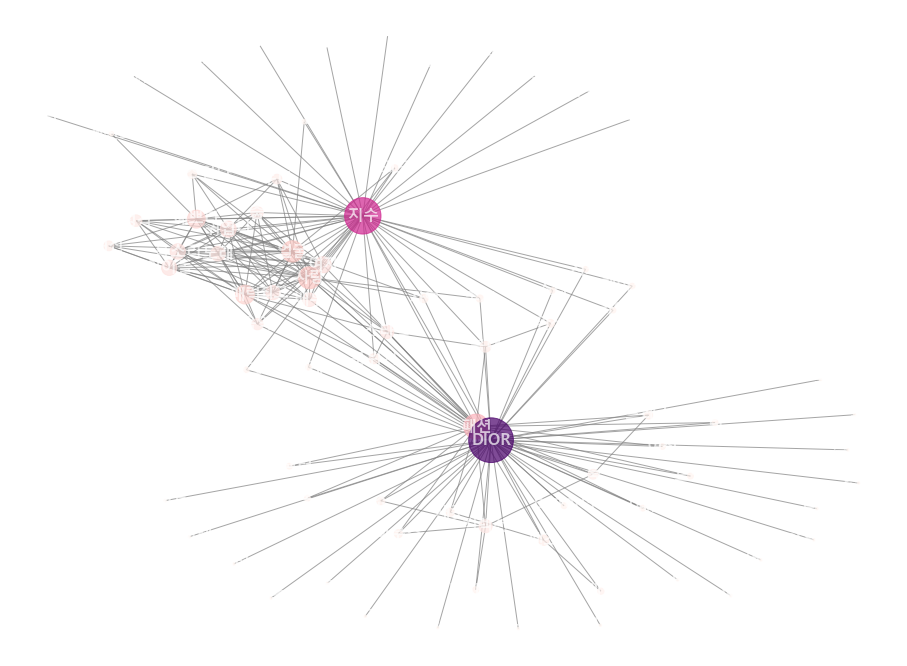

In [108]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_D9JI_top500_mins07-w.png', bbox_inches = 'tight', transparent = True)
plt.show()
